## Ejemplo 2: Matriz de correlaciones y mapas de calor

### 1. Objetivos:
    - Aprender a generar matrices de correlaciones y mapas de calor para cuantificar el coeficiente de correlación de Pearson de múltiples variables al mismo tiempo.

---
    
### 2. Desarrollo:

Analicemos un poco el siguiente dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='white')
sns.color_palette("rocket")

URL1 = 'https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/master/'
'# run in console: %whos DataFrame '

df = pd.read_csv(URL1 + 'Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Este dataset tiene muchas variables numéricas que se prestan a la aplicación de nuestro coeficiente de correlación de Pearson.

Antes de aplicarlo, removeré la variable dependiente ('outcome'), dado que es una variable binaria no apta para este tipo de análisis.

In [5]:
df_filtered = df.drop(columns=['outcome'])

In [6]:
df_filtered.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Tan fácil como esto. Como puedes observar, es un poco difícil discernir las distintas correlaciones de esta manera. Digamos que no 'saltan' a la vista.

Un par de cosas que podemos observar es que:

1. Hay una diagonal de 1s a la mitad de la matriz, donde cada variable se relaciona consigo misma.
2. Hay redundancia de datos debajo y arriba de la diagonal.

Usemos ahora un mapa de calor para visualizar esta matriz de una manera más fácil de interpretar:

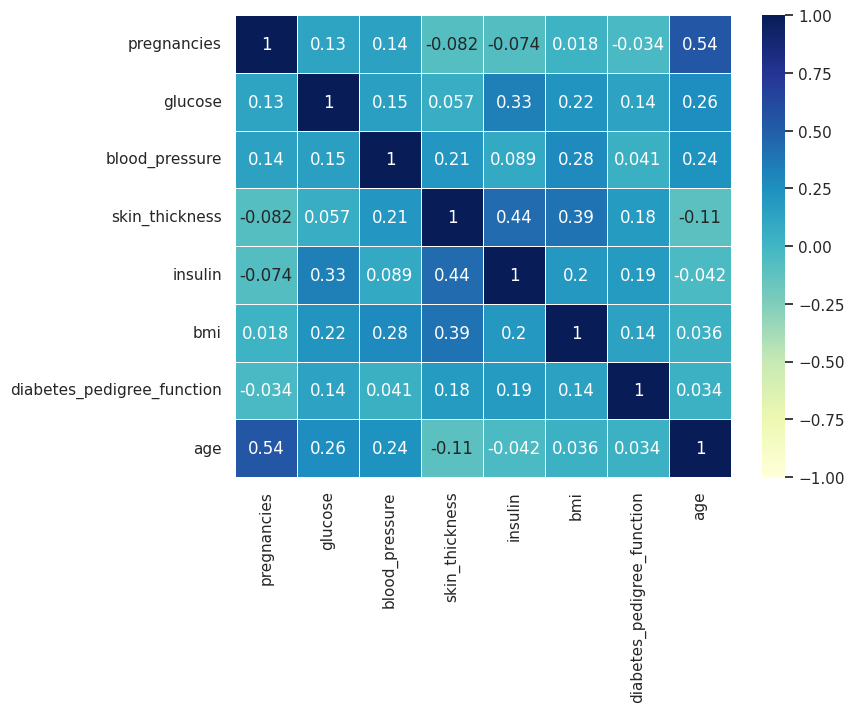

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Resulta mucho más sencillo visualizar las relaciones entre variables, ¿no es así?

¿Qué variables tienen correlaciones negativas? ¿Qué variables tienen correlaciones positivas? ¿Qué variables no tienen correlación?

Recuerda que estamos cuantificando la relación lineal entre dos variables. Esto significa que podría existir algún tipo de relación no lineal que no estamos visualizando con este mapa.